In [6]:
import numpy as np 
import pandas as pd  #for dataframe
import tweepy #for pulling tweets?
from textblob import TextBlob #tokenizing tweets
import matplotlib.pyplot as plt #for data visualization
import pymongo #organize data (how is it different than pandas)
import re

In [82]:
api_key = 'YrS7Zh6C5NMtUJ7oBIKOi6eet'
api_secret_key = 'YbzW3Nv8JKS2KBZRxLddbtzooHlKw56kXr3OvLj4rB5VReJPHO'
access_token = '540250745-abK3qRlEmiMTVKf4oq0x6gYhiW8Ch9sx7U3eEolC'
access_token_key = 'W1IMfz5ktW9aDkFq1Vs4A3MFUUM98FdCgknNuZ2j5GqAX'

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_key)
api = tweepy.API(auth)

In [83]:
'''def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

'''
# Create a custom search term and define the number of tweets
search_term = "#justin+trudeau -filter:retweets"

tweets = tweepy.Cursor(api.search, q=search_term, count = 200, since='2019-01-01').items(1000)


# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

print (sentiment_df)
sentiment_df.shape


    polarity                                              tweet
0   0.500000  You can do what you have to do and sometimes y...
1   0.050000  CameronAhmad Id say betrayed Canadians is an a...
2   0.000000       Une publicit virulente contre Trudeau justin
3   0.000000  Ottawa refuse de sengager verser une compensat...
4   0.000000  Plus de prtenoms pour le PLC assure Justin Tru...
5   0.000000  Legault demande des explications justin trudea...
6   0.000000  Plus de 100000 votants illgaux dbusqus sur la ...
7   0.000000  Le gouvernement Trudeau na pas rduit la lourde...
8  -0.012500  Puigdemont refus au Canada honteuse absence de...
9   0.000000  Kathleen Weil a servi de prtenom pour SNCLaval...
10 -0.350000  Expert Justin Trudeau s French is nt bad Quebe...
11  0.000000  Justin Trudeau encense la Chine en parlant au ...
12  0.000000  Trudeau prise 2 Le Journal de Montral JUSTIN C...
13  0.333333  Super Trudeau la rescousse Le Journal de Montr...
14  0.000000  Justin qui se fait dire de

(23, 2)

In [60]:
search_term_two = "#andrew+scheer -filter:retweets"
max_tweets = 40

tweets_cons = tweepy.Cursor(api.search,
                   q=search_term_two,
                   lang="en").items(200)

# Remove URLs
tweets_no_urls_cons = [remove_url(tweet.text) for tweet in tweets_cons]

# Create textblob objects of the tweets
sentiment_objects_cons = [TextBlob(tweet_two) for tweet in tweets_no_urls_cons]

# Create list of polarity valuesx and tweet text
sentiment_values_cons = [[tweet.sentiment.polarity, str(tweet_two)] for tweet in sentiment_objects]

# Create dataframe containing the polarity value and tweet text
sentiment_df_cons = pd.DataFrame(sentiment_values_cons, columns=["polarity", "tweet"])

print (sentiment_df_cons)


   polarity                                              tweet
0     0.500  You can do what you have to do and sometimes y...
1     0.050  CameronAhmad Id say betrayed Canadians is an a...
2    -0.350  Expert Justin Trudeau s French is nt bad Quebe...
3     0.250  CBCPolitics Well justintrudeau is right about ...
4     0.000  CBCPolitics Who will Canadians believe The unf...
5    -0.400  mannyottawa Cricrifi Unneighbourly Not Canadia...
6     0.625  CP24 Is it just me or does he look remarkably ...


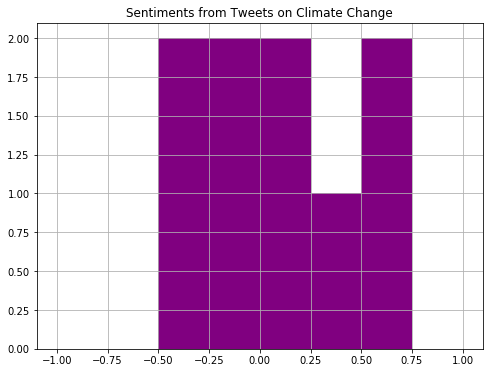

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()